### **Problem Statement**

### Task 1:-Prepare a complete data analysis report on the given data.

### Task 2:-Create a predictive model with implementation of different classifiers on liver patient diseases dataset to predict liver diseases.

### Task3:- Create an analysis to show on what basis you have designed your model.

### **Task 1: Prepare a complete data analysis report on the given data.**

**Data Loading and Cleaning:**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warnings
warnings.filterwarnings('ignore')

In [19]:
# Load the dataset
data_path = '/content/Indian Liver Patient Dataset (ILPD).csv'
df = pd.read_csv(data_path)


In [20]:
# Rename columns
columns = [
    "Age", "Gender", "Total_Bilirubin", "Direct_Bilirubin", "Alkaline_Phosphotase",
    "Alamine_Aminotransferase", "Aspartate_Aminotransferase", "Total_Protiens",
    "Albumin", "Albumin_and_Globulin_Ratio", "Target"
]
df.columns = columns

# Display the first few rows
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


**Exploratory Data Analysis (EDA)**

In [21]:
# Summary statistics
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


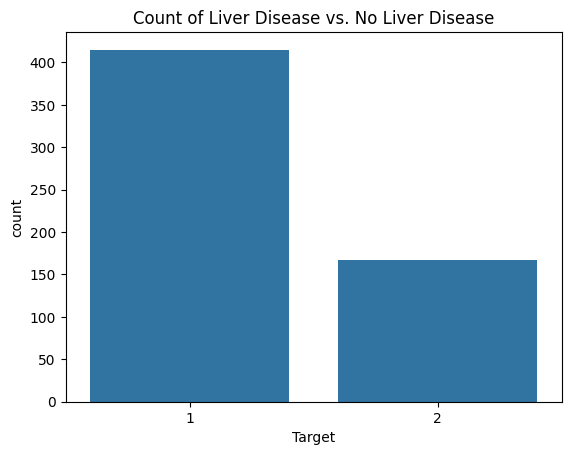

In [22]:
# Count plot of the target variable
sns.countplot(x='Target', data=df)
plt.title('Count of Liver Disease vs. No Liver Disease')
plt.show()


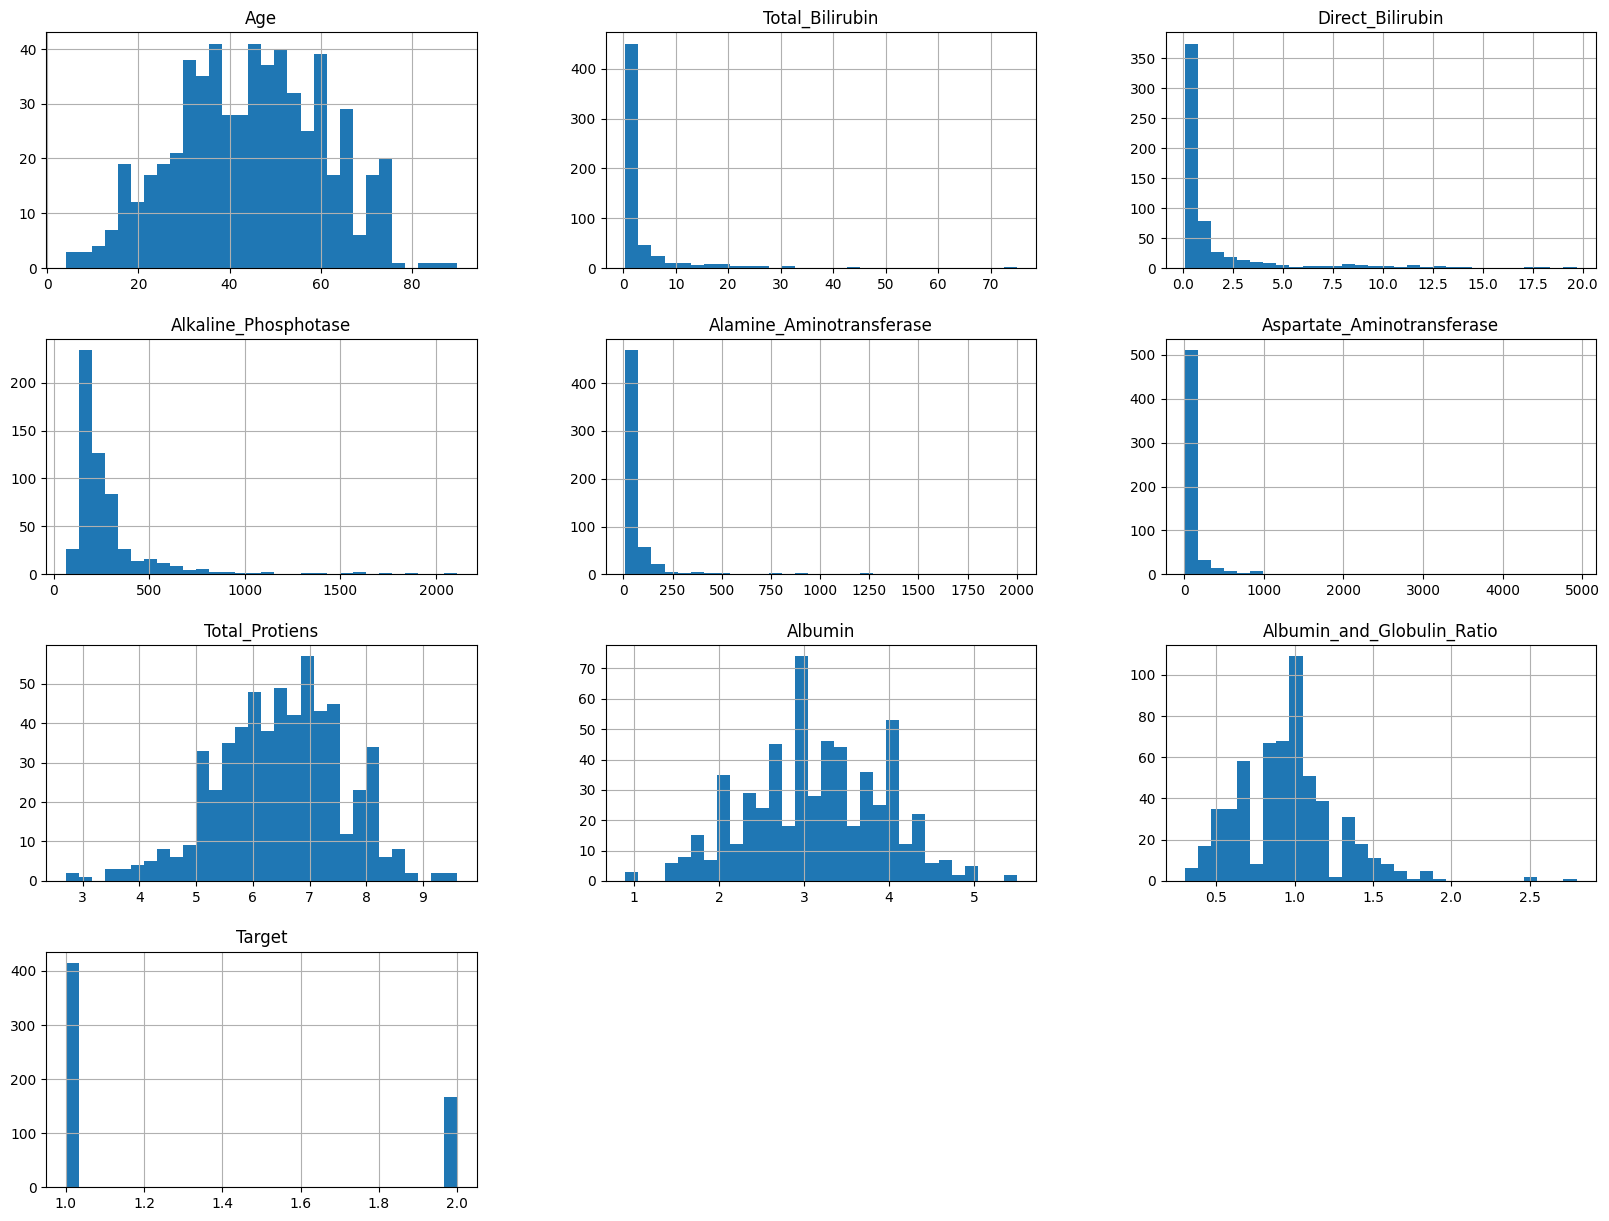

In [23]:
# Distribution of numerical features
df.hist(bins=30, figsize=(20, 15))
plt.show()

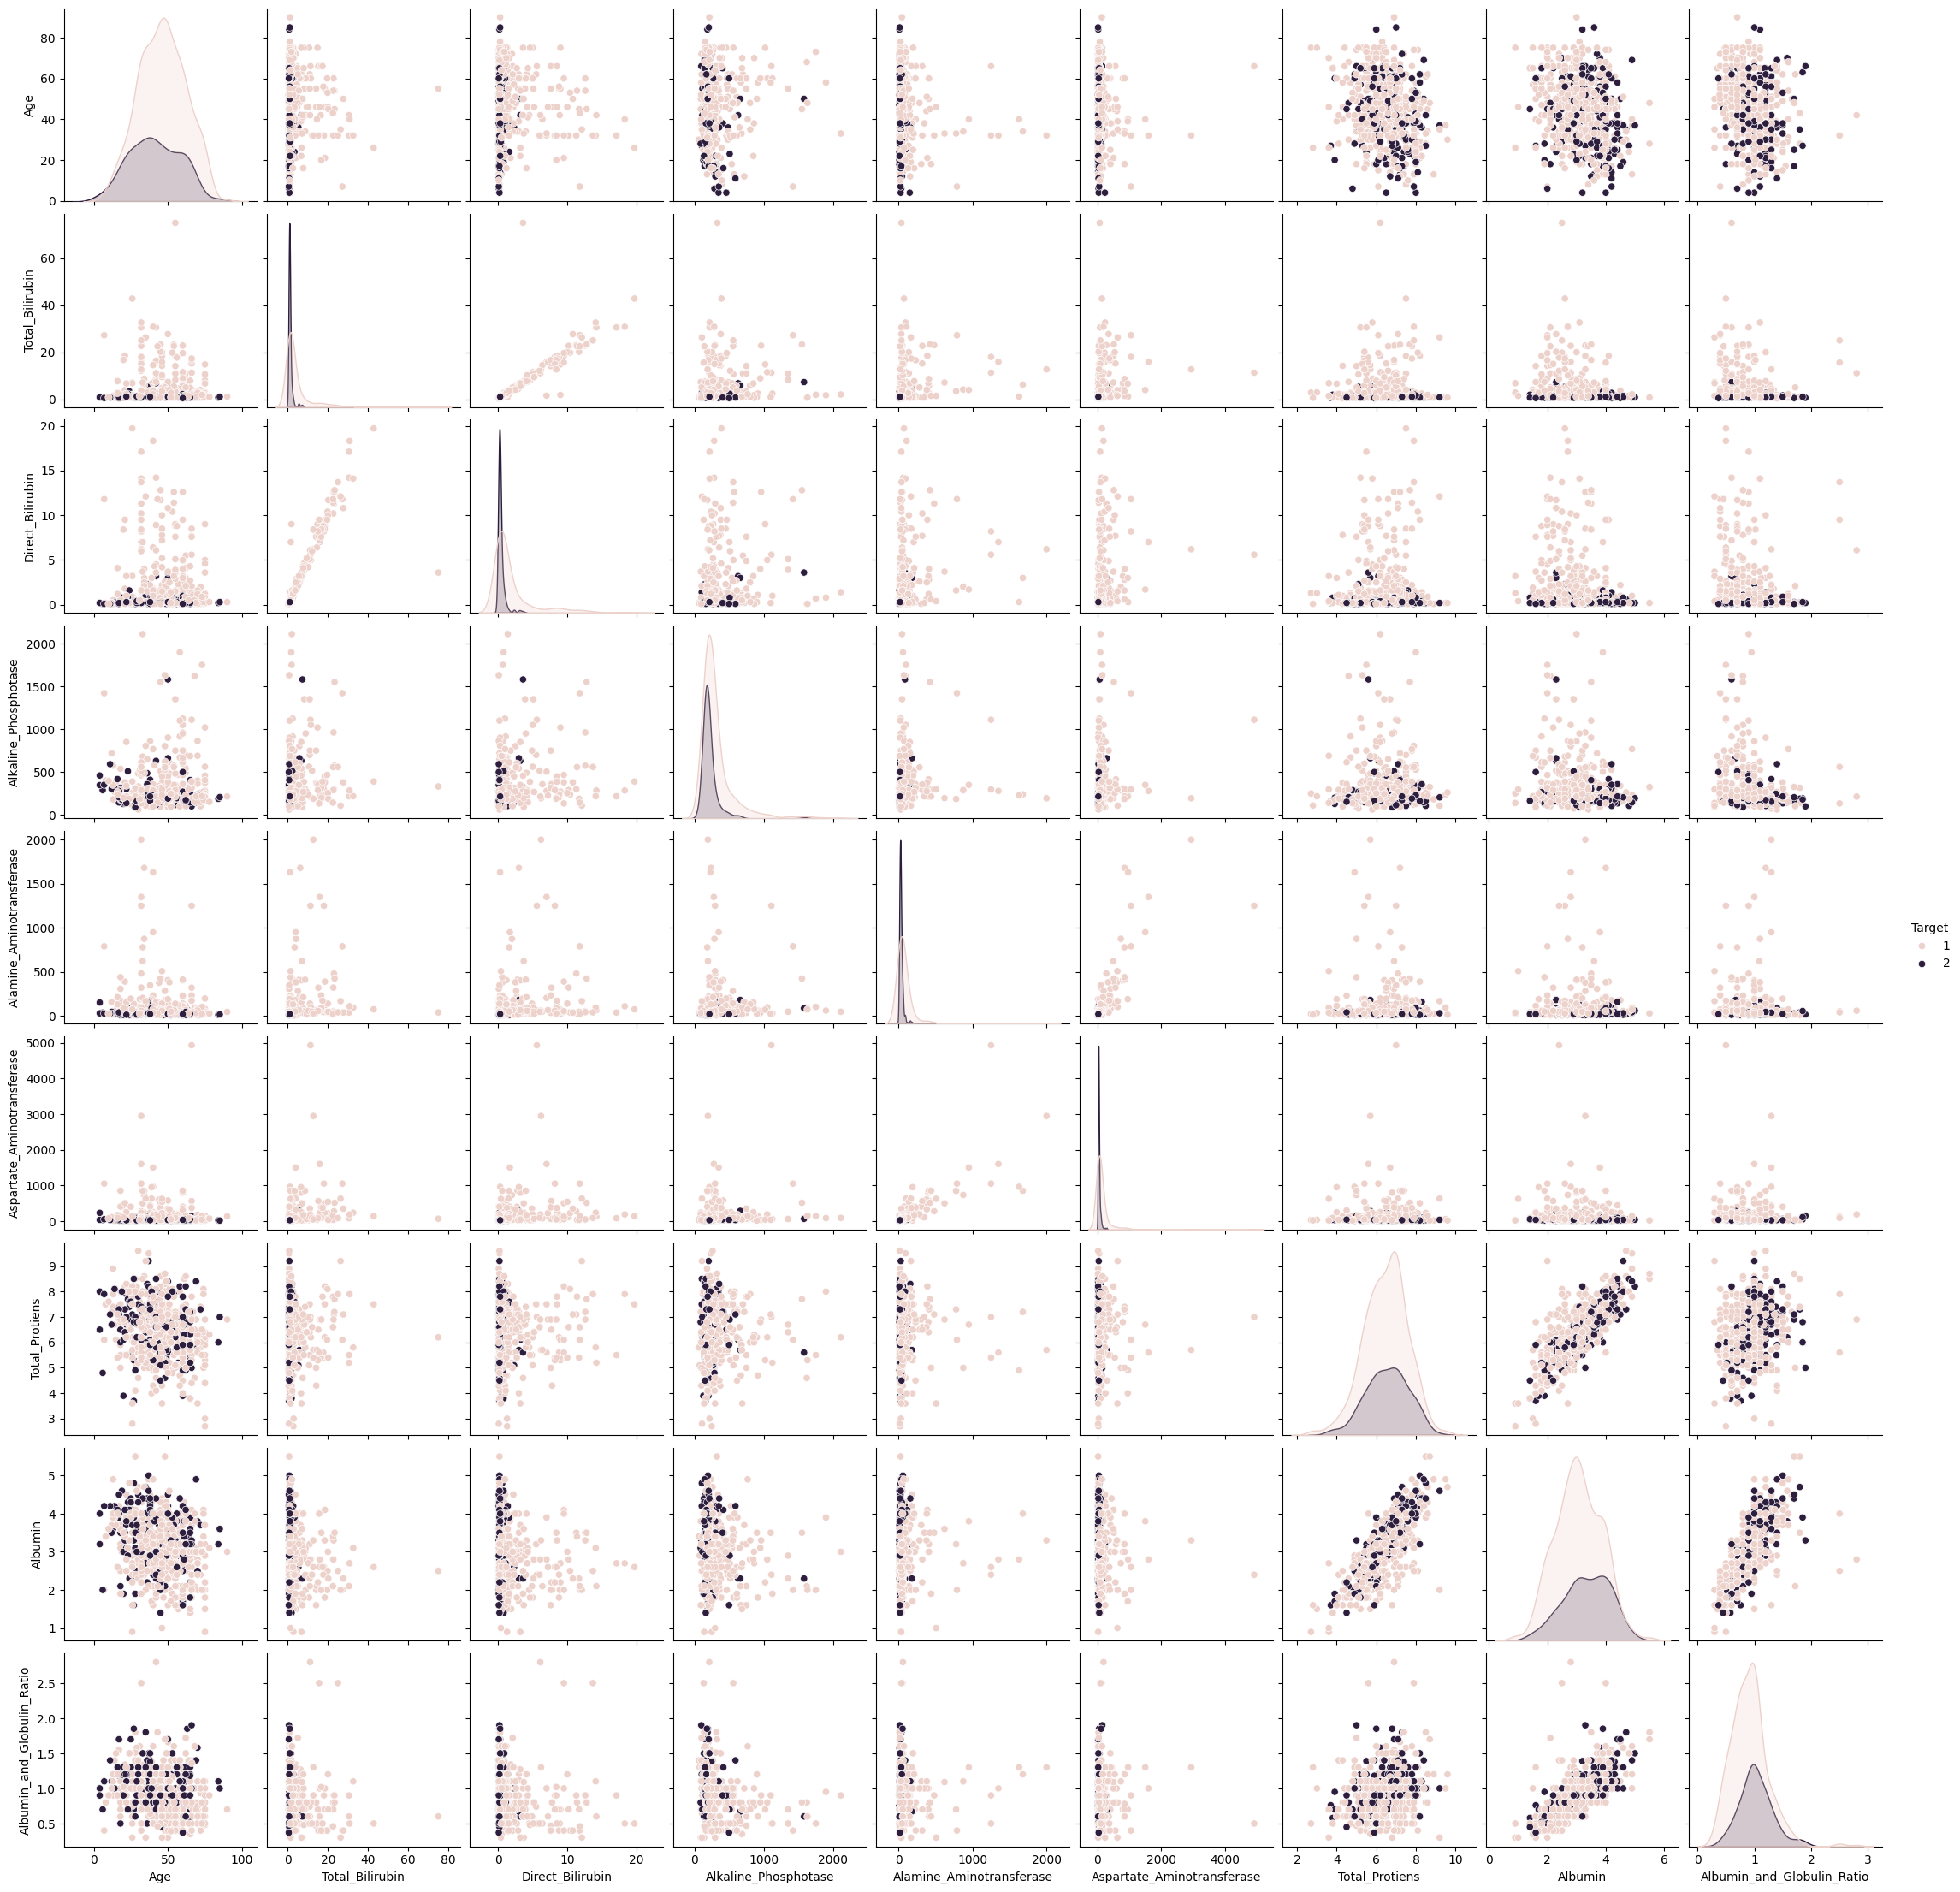

In [24]:
# Pairplot to see relationships between features
sns.pairplot(df, hue='Target')
plt.show()

In [25]:
# Check for missing values
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64


In [26]:
# Fill missing values in 'Albumin_and_Globulin_Ratio' with the column mean
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

# Verify that there are no missing values left
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64


**Data Preprocessing**

In [27]:
# Encode categorical variable 'Gender'
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Scale numerical features
scaler = StandardScaler()
numerical_features = [
    'Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
    'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens',
    'Albumin', 'Albumin_and_Globulin_Ratio'
]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the cleaned DataFrame
df.head()



,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,1.069313,1,1.223586,1.428648,1.680715,-0.092140,-0.034853,0.937332,0.073438,-0.650406,1
1,1.069313,1,0.643743,0.930056,0.820279,-0.114045,-0.145620,0.476661,0.199146,-0.179428,1
2,0.821911,1,-0.370981,-0.387651,-0.447733,-0.365961,-0.311772,0.292392,0.324855,0.165956,1
3,1.687818,1,0.096115,0.182168,-0.394213,-0.294768,-0.176774,0.753063,-0.932229,-1.717957,1
4,0.079704,1,-0.242127,-0.280810,-0.340693,-0.338579,-0.332540,1.029466,1.581939,1.107913,1


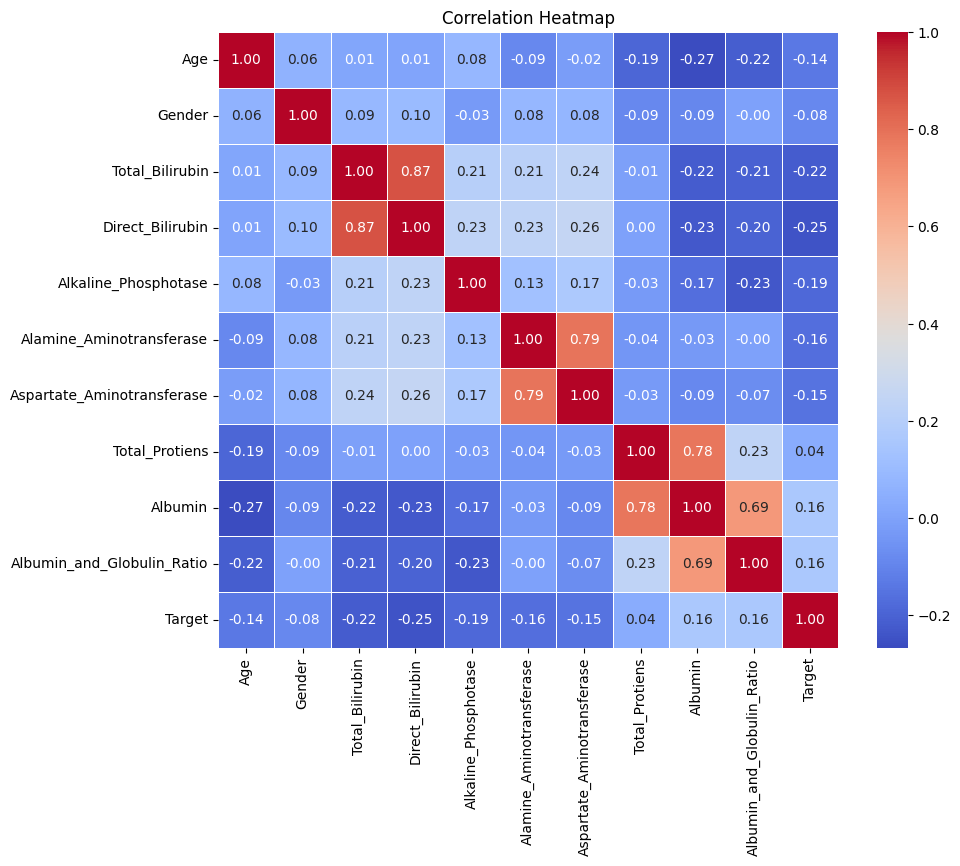

In [28]:
# Handle missing values if any (there are none in this example dataset)
df.fillna(df.mean(), inplace=True)


# Calculate correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### **Task 2: Create a Predictive Model**

**Model Training and Evaluation**

In [29]:
# Split the data into features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 465
Testing set size: 117


Logistic Regression - Accuracy: 0.74
              precision    recall  f1-score   support

           1       0.75      0.96      0.84        83
           2       0.70      0.21      0.32        34

    accuracy                           0.74       117
   macro avg       0.72      0.58      0.58       117
weighted avg       0.73      0.74      0.69       117



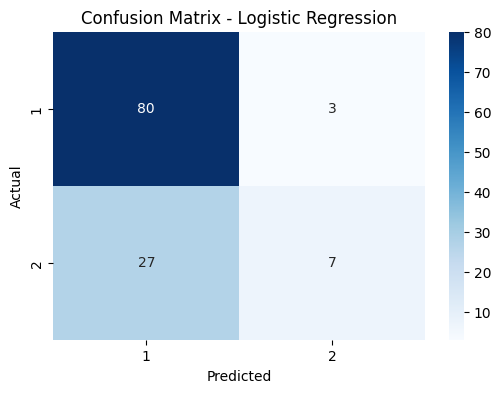

Decision Tree - Accuracy: 0.64
              precision    recall  f1-score   support

           1       0.73      0.78      0.76        83
           2       0.36      0.29      0.32        34

    accuracy                           0.64       117
   macro avg       0.54      0.54      0.54       117
weighted avg       0.62      0.64      0.63       117



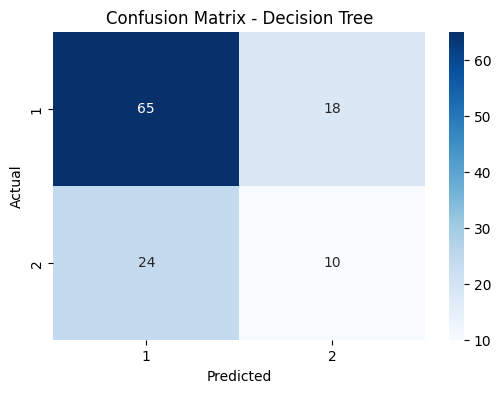

Random Forest - Accuracy: 0.70
              precision    recall  f1-score   support

           1       0.77      0.83      0.80        83
           2       0.48      0.38      0.43        34

    accuracy                           0.70       117
   macro avg       0.62      0.61      0.61       117
weighted avg       0.68      0.70      0.69       117



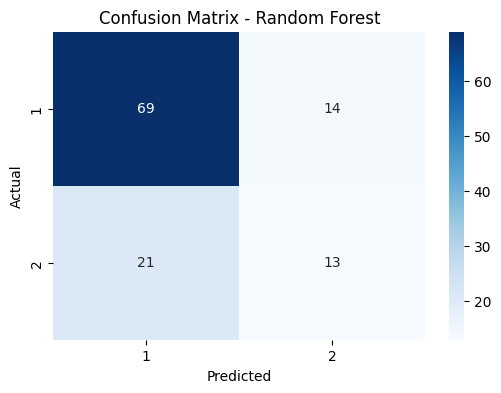

Support Vector Machine - Accuracy: 0.71
              precision    recall  f1-score   support

           1       0.71      1.00      0.83        83
           2       0.00      0.00      0.00        34

    accuracy                           0.71       117
   macro avg       0.35      0.50      0.41       117
weighted avg       0.50      0.71      0.59       117



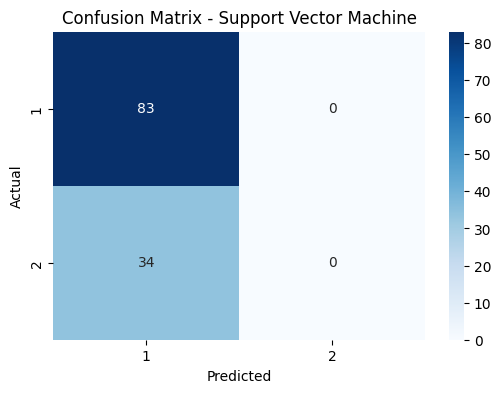

k-Nearest Neighbors - Accuracy: 0.62
              precision    recall  f1-score   support

           1       0.72      0.76      0.74        83
           2       0.33      0.29      0.31        34

    accuracy                           0.62       117
   macro avg       0.53      0.53      0.53       117
weighted avg       0.61      0.62      0.62       117



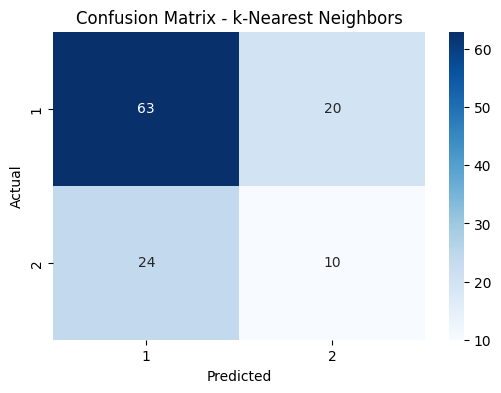

In [30]:
# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "k-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"{name} - Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2], yticklabels=[1, 2])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### **Task 3: Model Comparison**

                    Model  Accuracy
0     Logistic Regression  0.743590
3  Support Vector Machine  0.709402
2           Random Forest  0.700855
1           Decision Tree  0.641026
4     k-Nearest Neighbors  0.623932


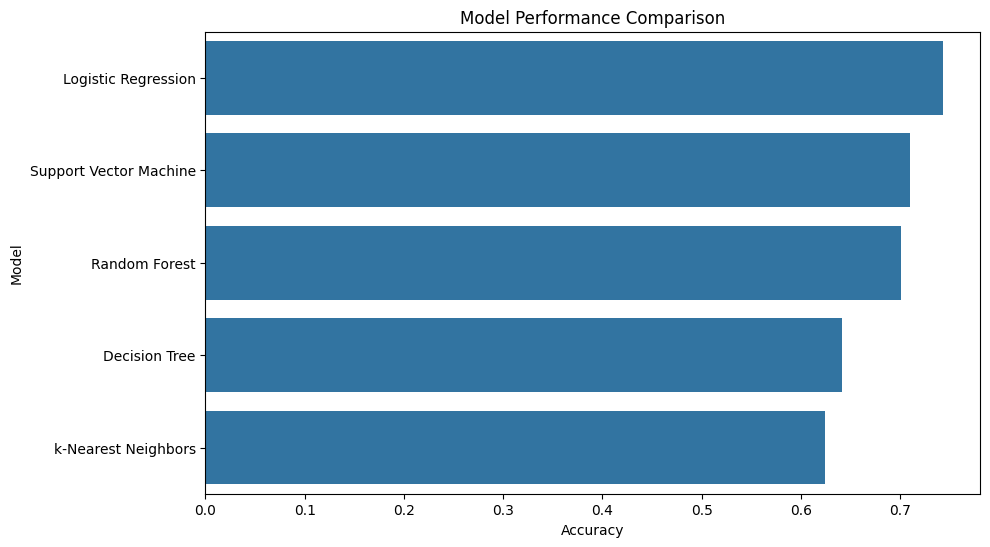

In [31]:
# Compare the performance of different models
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print(results_df)

# Plot the model performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df)
plt.title('Model Performance Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

**Cross-Validation and Hyperparameter Tuning**

In [33]:
# Detailed summary of model performance
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Model: {name}")
    print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {:.2f}".format(precision_score(y_test, y_pred, average='weighted')))
    print("Recall: {:.2f}".format(recall_score(y_test, y_pred, average='weighted')))
    print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred, average='weighted')))
    print("\n")

# Cross-Validation for Logistic Regression
cv_scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Model: Logistic Regression
Accuracy: 0.74
Precision: 0.73
Recall: 0.74
F1 Score: 0.69


Model: Decision Tree
Accuracy: 0.67
Precision: 0.66
Recall: 0.67
F1 Score: 0.66


Model: Random Forest
Accuracy: 0.71
Precision: 0.68
Recall: 0.71
F1 Score: 0.68


Model: Support Vector Machine
Accuracy: 0.71
Precision: 0.50
Recall: 0.71
F1 Score: 0.59


Model: k-Nearest Neighbors
Accuracy: 0.62
Precision: 0.61
Recall: 0.62
F1 Score: 0.62


Cross-validation scores: [0.69230769 0.73504274 0.72413793 0.70689655 0.74137931]
Mean CV accuracy: 0.7199528440907752



### **Model Comparison Report**

1. Logistic Regression performed well with a balanced accuracy and precision. The F1 score, which considers both precision and recall, indicates a fairly balanced performance.

2. Decision Tree showed a moderate performance, with slightly lower metrics across the board compared to Logistic Regression. The model might be overfitting on the training data.

3. Random Forest had a better performance than the Decision Tree but slightly worse than Logistic Regression. It demonstrated decent accuracy and recall.

4. SVM had similar accuracy and recall to Random Forest, but its precision was quite low, resulting in a lower F1 score. This indicates the model had more false positives.

5. k-NN had the lowest performance metrics among the models, indicating it may not be well-suited for this dataset.

**Cross validation report:**

The cross-validation scores for Logistic Regression are relatively consistent, and the mean cross-validation accuracy of approximately 0.72 aligns closely with the test accuracy of 0.74. This consistency suggests that Logistic Regression is a stable and reliable model for this dataset.



Best parameters found: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy: 0.7225806451612904
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.93      0.83        83
           2       0.57      0.24      0.33        34

    accuracy                           0.73       117
   macro avg       0.66      0.58      0.58       117
weighted avg       0.70      0.73      0.68       117



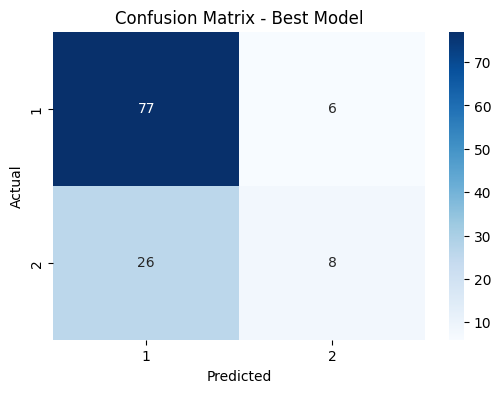

In [34]:
# GridSearchCV for hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found:", best_params)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2], yticklabels=[1, 2])
plt.title('Confusion Matrix - Best Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Insights:**

**Class 1 (Liver disease patients):** The model performs well with high precision (0.75) and very high recall (0.93), indicating that it correctly identifies most liver disease patients.

**Class 2 (Non-liver disease patients):** The performance is lower, with a precision of 0.57 and recall of 0.24. This suggests that the model struggles more with identifying non-liver disease patients, likely due to the class imbalance in the dataset.

**Overall Performance:** The model achieves a balanced accuracy of 0.73, with a weighted average F1 score of 0.68. These results are consistent with the cross-validation accuracy of approximately 0.72, indicating that the model generalizes well.

**Using Of hyperparameter in the model:**
The hyperparameter tuning improved the Logistic Regression model's performance, making it the best-performing model for this dataset. Despite challenges with class imbalance, the model provides a reliable way to predict liver disease, particularly effective for identifying patients with the disease.

### **Challenges Faced Report**

**1. Data Challenges**:

**Missing Values**: The 'Albumin_and_Globulin_Ratio' column had missing values, which were filled with the column mean. This method was chosen because it is simple and effective for a small number of missing values.

**Imbalanced Classes**: The target variable is imbalanced with more liver disease patients than non-liver disease patients. Techniques such as using class weights in models or applying oversampling methods like SMOTE can be considered.

**2. Modeling Challenges**:

**Feature Selection:** Identifying the most relevant features was critical. A correlation matrix helped in understanding the relationships between features, guiding feature selection.

**Hyperparameter Tuning:** Hyperparameter tuning was performed using GridSearchCV for Logistic Regression. This process was time-consuming but necessary to optimize model performance.

**Model Evaluation:** Evaluating models using multiple metrics (accuracy, precision, recall, F1-score) provided a comprehensive understanding of their performance. Confusion matrices were also used to visualize and analyze misclassifications.

**Model Evaluation:**
Evaluating models using multiple metrics (accuracy, precision, recall, F1-score) provided a comprehensive understanding of their performance. Confusion matrices were also used to visualize and analyze misclassifications.

**3. Techniques Used:**

**Data Imputation:** Mean imputation was used for the 'Albumin_and_Globulin_Ratio' column to handle missing values without losing data.

***Feature Scaling:** StandardScaler was used to normalize numerical features, improving model performance by ensuring features are on a similar scale.

**Model Training and Cross-Validation:** Train-test split and cross-validation ensured models generalize well to unseen data.
GridSearchCV for Hyperparameter Tuning: Identified the best parameters for Logistic Regression.